In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


In [3]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [4]:
train_data = np.load('../data/train_data.npz')
X_train, y_train = train_data['images']/255, train_data['labels']

In [11]:
_input = Input(shape=(224, 224, 3))
blk1_conv1 = Conv2D(16, kernel_size=(3, 3), padding='same',
                    activation='relu')(_input)
blk1_conv2 = Conv2D(16, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk1_conv1)
max_pool1 = MaxPooling2D(pool_size=(2, 2))(blk1_conv2)
blk2_conv1 = Conv2D(32, kernel_size=(3, 3), padding='same',
                    activation='relu')(max_pool1)
blk2_conv2 = Conv2D(32, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk2_conv1)
max_pool2 = MaxPooling2D(pool_size=(2, 2))(blk2_conv2)
blk3_conv1 = Conv2D(64, kernel_size=(3, 3), padding='same',
                    activation='relu')(max_pool2)
blk3_conv2 = Conv2D(64, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk3_conv1)
blk3_conv3 = Conv2D(64, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk3_conv2)
max_pool3 = MaxPooling2D(pool_size=(2, 2))(blk3_conv3)
blk4_conv1 = Conv2D(128, kernel_size=(3, 3), padding='same',
                    activation='relu')(max_pool3)
blk4_conv2 = Conv2D(128, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk4_conv1)
blk4_conv3 = Conv2D(128, kernel_size=(3, 3), padding='same',
                    activation='relu')(blk4_conv2)
max_pool4 = MaxPooling2D(pool_size=(2, 2))(blk4_conv3)
_flatten = Flatten()(max_pool4)
fc1 = Dense(1024, activation='relu')(_flatten)
fc2 = Dense(1024, activation='relu')(fc1)
_output = Dense(1, activation='sigmoid')(fc2)

model = Model(inputs=[_input], outputs=[_output])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
__________

In [13]:
optimizer = Adam(lr=0.00025)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
              patience=10, verbose=1)
results = model.fit(X_train, y_train, epochs=50,
                    batch_size=20, validation_split=0.2,
                    callbacks=[reduce_lr]
                   )

Train on 1836 samples, validate on 459 samples
Epoch 1/50
1836/1836 [==============================] - 41s - loss: 0.6581 - acc: 0.6209 - val_loss: 0.5061 - val_acc: 0.7560
Epoch 2/50
1836/1836 [==============================] - 41s - loss: 0.5771 - acc: 0.6961 - val_loss: 0.5649 - val_acc: 0.7625
Epoch 3/50
1836/1836 [==============================] - 41s - loss: 0.4405 - acc: 0.7941 - val_loss: 0.3194 - val_acc: 0.8715
Epoch 4/50
1836/1836 [==============================] - 41s - loss: 0.3754 - acc: 0.8475 - val_loss: 0.2808 - val_acc: 0.8998
Epoch 5/50
1836/1836 [==============================] - 41s - loss: 0.3727 - acc: 0.8350 - val_loss: 0.3211 - val_acc: 0.8780
Epoch 6/50
1836/1836 [==============================] - 41s - loss: 0.2799 - acc: 0.8829 - val_loss: 0.1890 - val_acc: 0.9303
Epoch 7/50
1836/1836 [==============================] - 41s - loss: 0.2075 - acc: 0.9194 - val_loss: 0.1942 - val_acc: 0.9216
Epoch 8/50
1836/1836 [==============================] - 41s - loss: 0.1

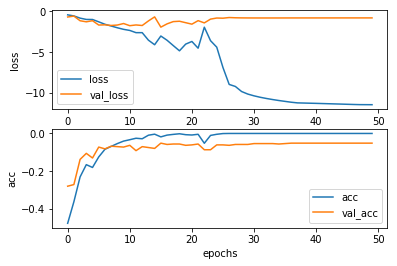

In [15]:
from matplotlib import pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(results.epoch, np.log(results.history['loss']), label='loss')
plt.plot(results.epoch, np.log(results.history['val_loss']), label='val_loss')
plt.ylabel('loss')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(results.epoch, np.log(results.history['acc']), label='acc')
plt.plot(results.epoch, np.log(results.history['val_acc']), label='val_acc')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.show()